# UNIDAD 2 (Análisis Exploratorio de Datos)

In [5]:
import pandas as pd
filename='Departamentos de Córdoba seteado.xlsx' 
data = pd.read_excel(filename) # leemos el excel
print(f" Filas y Columnas: {data.shape}")
print("------------------------------------------------------------------------------------------")
print(f" Tipo de dato de columnas: {data.dtypes}")
print("------------------------------------------------------------------------------------------")
print(data.describe())
print("------------------------------------------------------------------------------------------")
# X = data[['Población', 'Consumo','IDHR','NBI']] 
# Y = data['PBG'] 
data

 Filas y Columnas: (26, 7)
------------------------------------------------------------------------------------------
 Tipo de dato de columnas: N°                 int64
Departamentos     object
Población          int64
Consumo          float64
IDHR             float64
NBI              float64
PBG                int64
dtype: object
------------------------------------------------------------------------------------------
              N°     Población       Consumo       IDHR        NBI  \
count  26.000000  2.600000e+01  2.600000e+01  26.000000  26.000000   
mean   13.500000  1.217464e+05  7.637468e+05   0.677269  18.767692   
std     7.648529  2.497328e+05  1.566637e+06   0.200314   9.619295   
min     1.000000  4.601000e+03  2.886416e+04   0.045000   8.800000   
25%     7.250000  3.120700e+04  1.957707e+05   0.561500  10.752500   
50%    13.500000  5.162200e+04  3.238391e+05   0.771500  15.690000   
75%    19.750000  1.064318e+05  6.676732e+05   0.827000  25.197500   
max    26.00000

,N°,Departamentos,Población,Consumo,IDHR,NBI,PBG
0,1,Calamuchita,46870,294029.84,0.793,15.06,466189
1,2,Capitál,1306725,8197419.00,0.786,12.20,9273055
2,3,Colón,182028,1141909.50,0.807,16.36,1271521
3,4,Cruz del Eje,52906,331895.61,0.518,29.16,289040
4,5,General Roca,33415,209621.89,0.830,15.27,476036
5,6,General San Martín,118429,742937.43,0.813,9.96,1180969
6,7,Ischilín,30471,191153.63,0.602,21.08,205080
7,8,Juárez Celman,88997,558304.13,0.805,9.82,1382524
8,9,Marcos Juárez,100200,628579.97,0.871,8.80,1539693
9,10,Minas,4897,30722.42,0.420,39.46,26750


In [6]:
# Correlaciones entre variables numéricas
pd.set_option('display.width', 100) # ajustar config de pandas para visualización
correlation = data.iloc[:,2:].corr(method='pearson')
correlation

,Población,Consumo,IDHR,NBI,PBG
Población,1.000000,1.000000,0.254220,-0.304589,0.981240
Consumo,1.000000,1.000000,0.254220,-0.304589,0.981240
IDHR,0.254220,0.254220,1.000000,-0.836739,0.337932
NBI,-0.304589,-0.304589,-0.836739,1.000000,-0.415706
PBG,0.981240,0.981240,0.337932,-0.415706,1.000000


In [7]:
# Sesgo de cada variable
data.iloc[:,2:].skew()

Población    4.598814
Consumo      4.598814
IDHR        -1.467112
NBI          0.960895
PBG          4.017322
dtype: float64

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

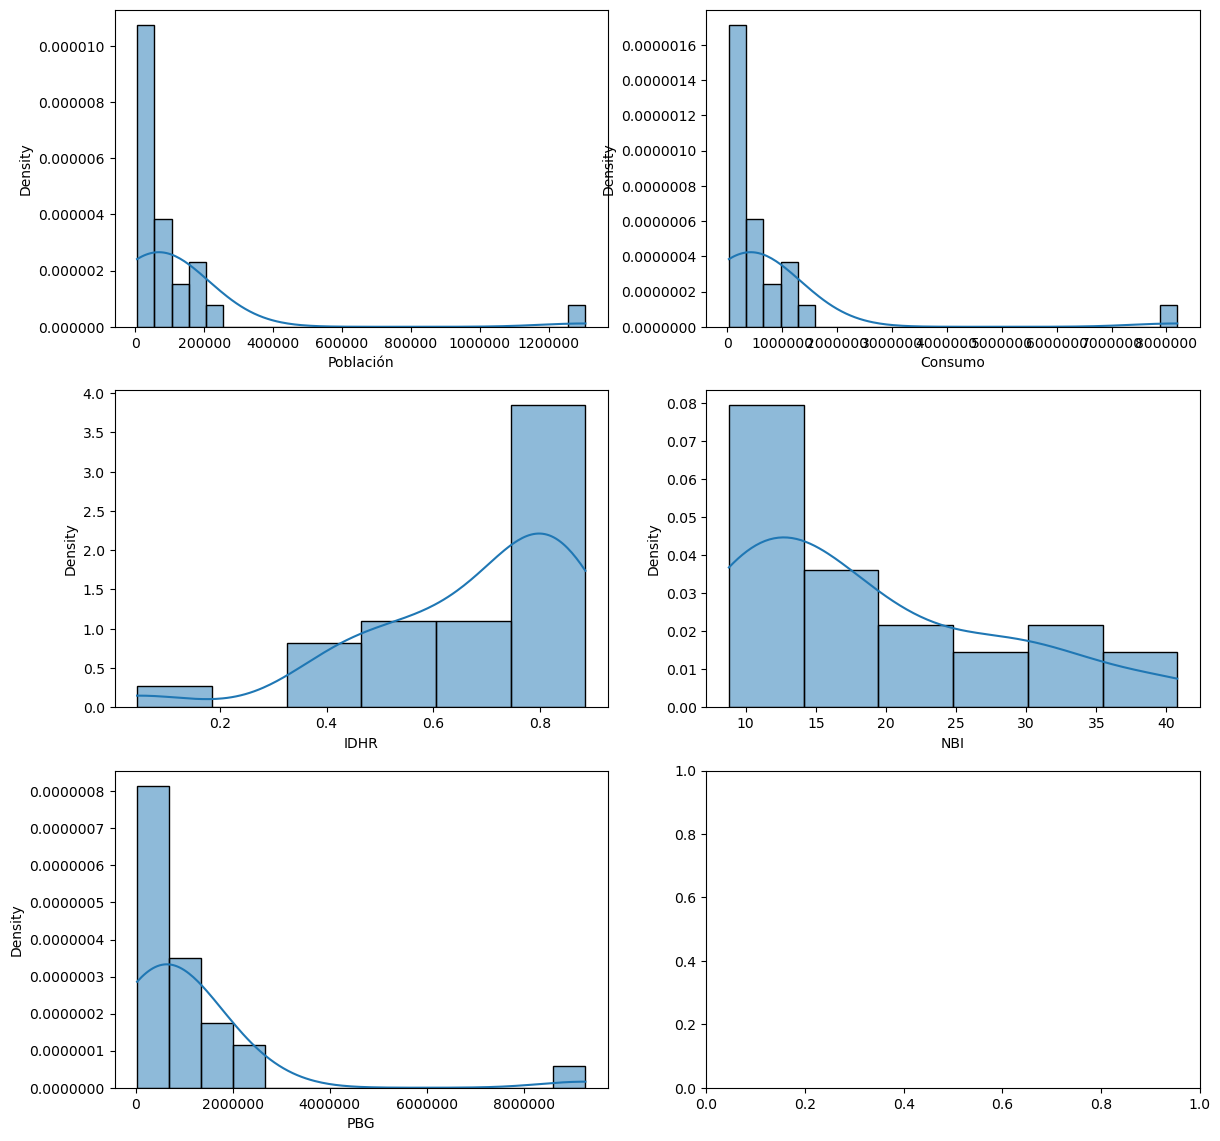

In [8]:
# Histograma con densidad
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

f, ax = plt.subplots(3,2,figsize=(14,14)) # creamos matriz 3x2 (en donde ubicar cada gráfico) y asignamos tamaño (ir probando tamaños)
# cada atributo lo dibujamos por separado
sns.histplot(data["Población"], ax=ax[0, 0], kde=True, stat="density") # ponemos ax= la parte de la "matriz" donde queremos ver el gráfico
sns.histplot(data["Consumo"], ax=ax[0, 1], kde=True, stat="density") # con kde= True ponemos que nos trace una curva de densidad con la etiqueta density
sns.histplot(data["IDHR"], ax=ax[1, 0], kde=True, stat="density")
sns.histplot(data["NBI"], ax=ax[1, 1], kde=True, stat="density")
sns.histplot(data["PBG"], ax=ax[2, 0], kde=True, stat="density") # no prestarle importancia a este
# ajusto los formatos numéricos (para que no me los muestre en notación científica), sobre cada eje
for axis in ax.flat: # para cada subplot en ax.flat(manera de aplanar la matriz de ejes unidimensionalmente)
    axis.ticklabel_format(style='plain', axis='both')
    # style='plain' es que me muestre en decimal
    # axis='both' que me los muestre tanto en el eje x como y
plt.show()

C:\Users\Maxi Mores\AppData\Local\Temp\ipykernel_3944\108333962.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data.plot(ax=ax,kind='box',subplots=True,layout=(3,3),sharex=False) # ponemos en tipo=box


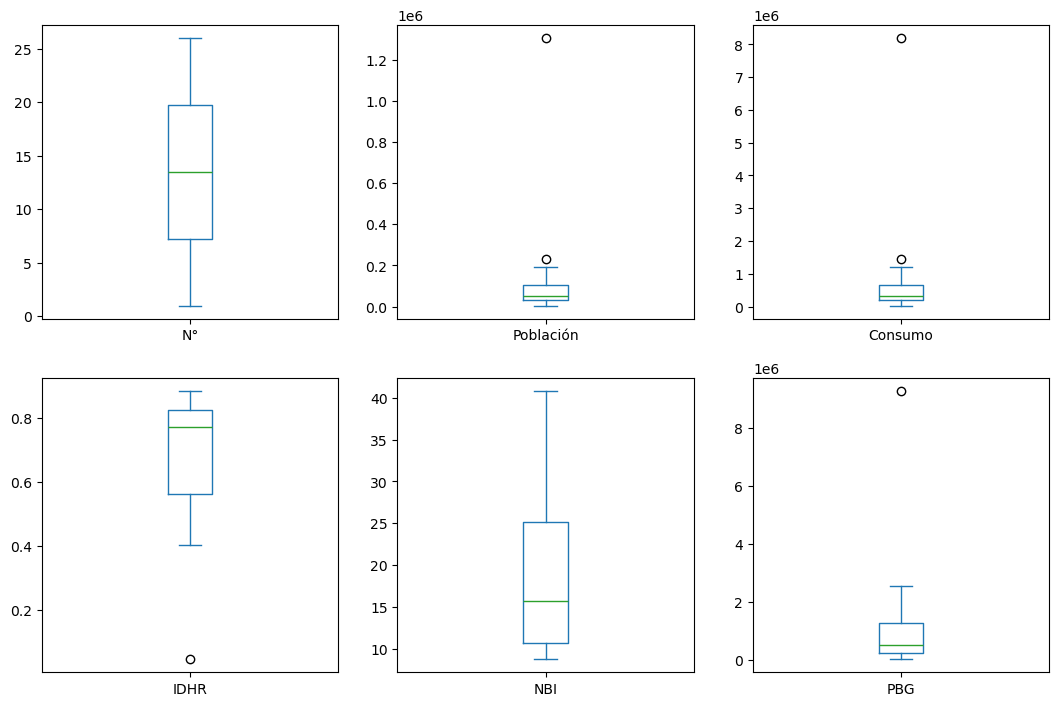

In [9]:
# Diagrama de caja
fig = plt.figure(figsize=(13,13))
ax = fig.gca()
data.plot(ax=ax,kind='box',subplots=True,layout=(3,3),sharex=False) # ponemos en tipo=box
plt.show()
# Ciruclos outliers
# Comparar mediana en caja (ignorar N que son los índices)

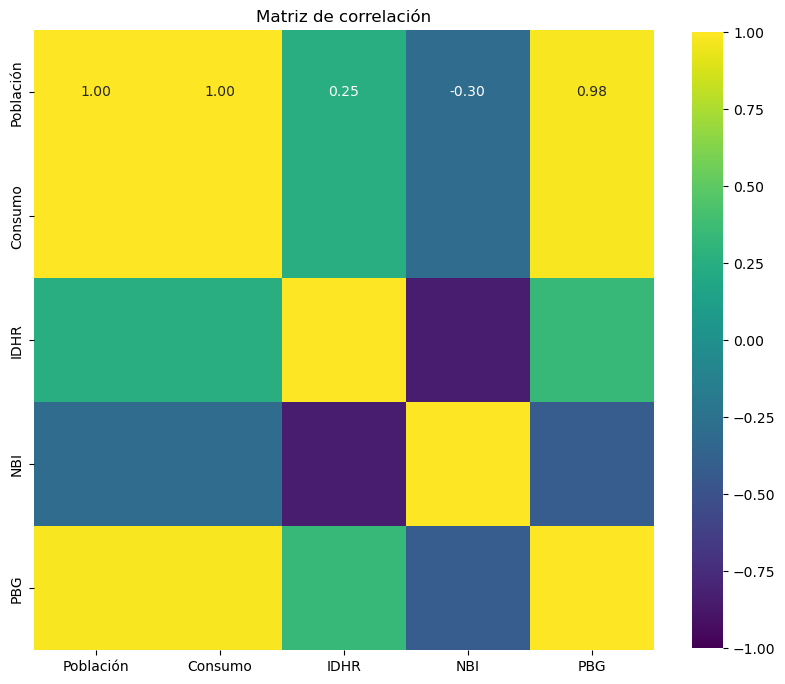

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

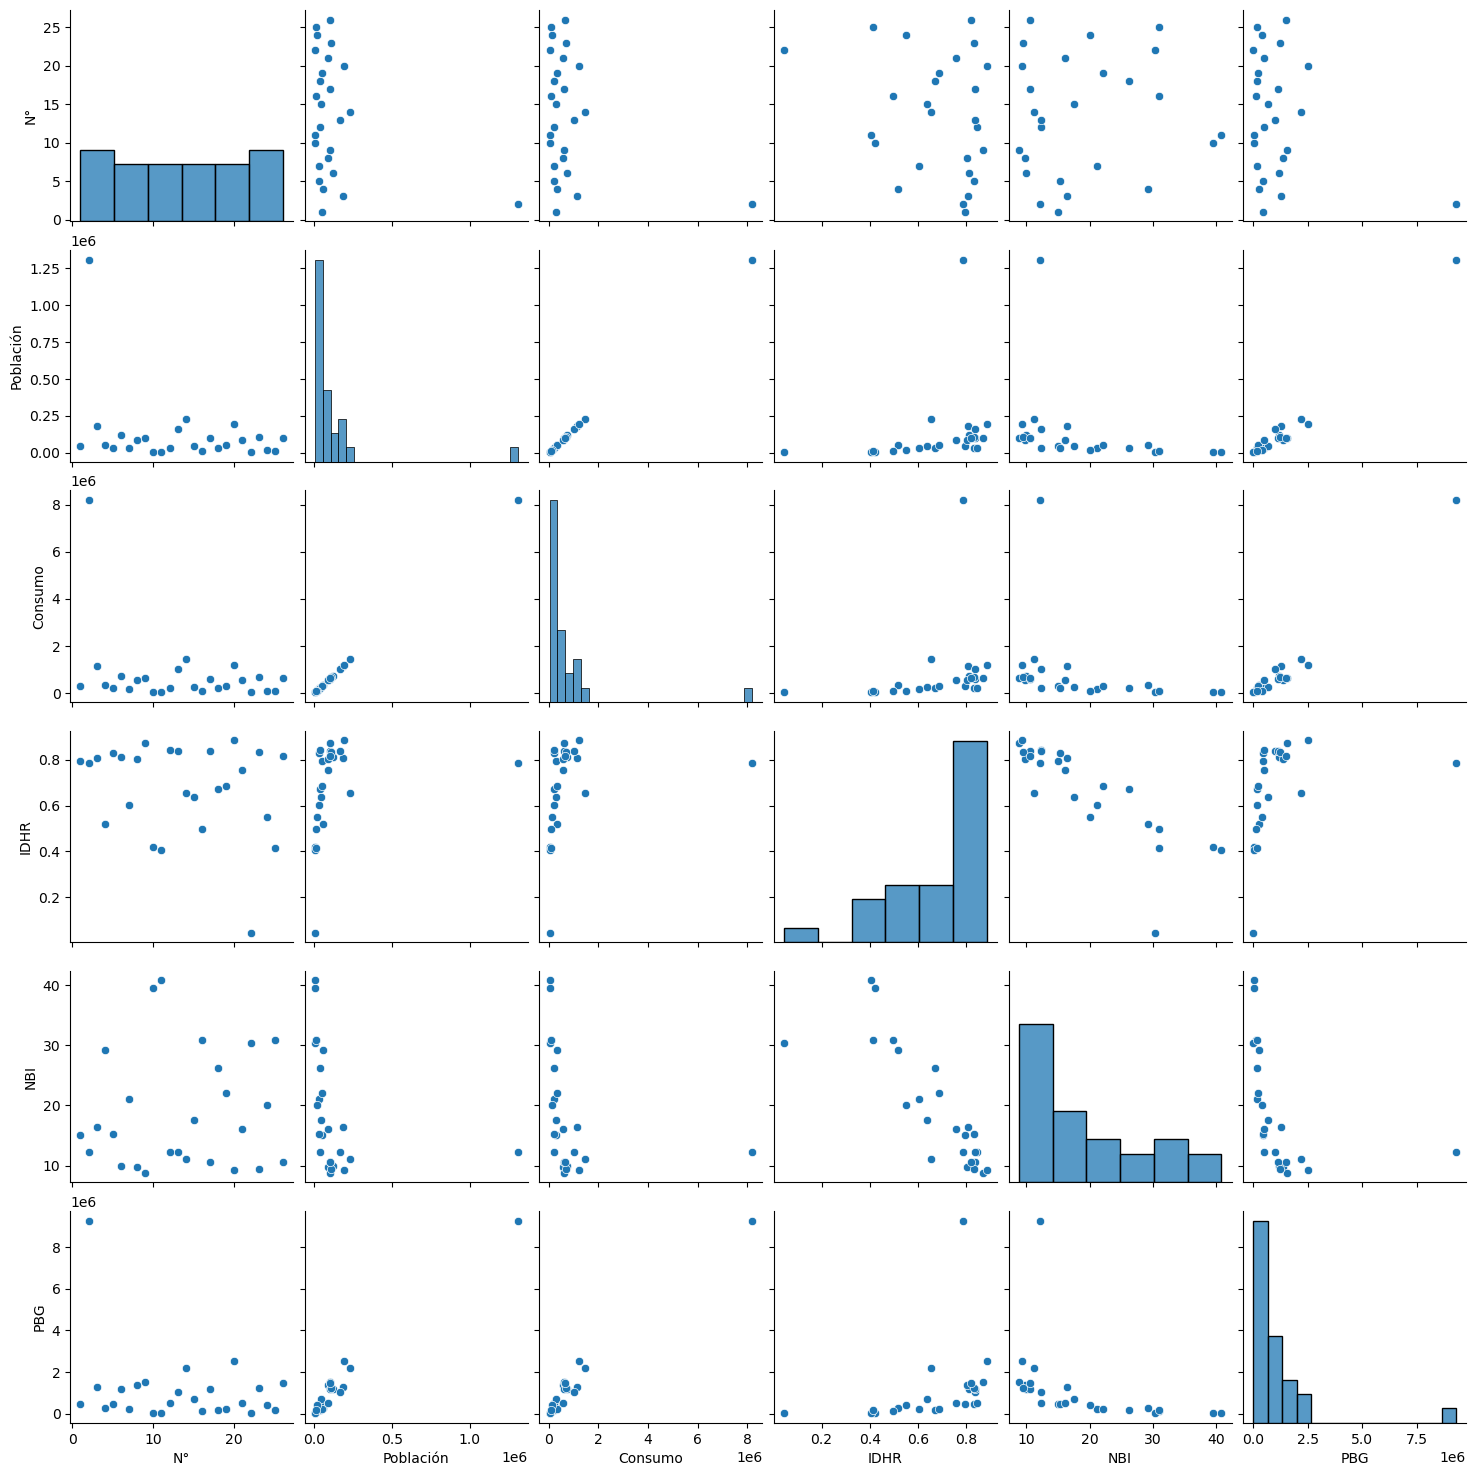

In [10]:
# Matriz de correlación
correlation = data.iloc[:,2:].corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation,square=True,vmin=-1,vmax=1,annot=True,cmap='viridis',fmt='.2f',cbar_kws={"shrink": 0.8},annot_kws={"ha": 'center', "va": 'center'}) # función para la correlación, square para que este cuadrado, annot para que me muestre coeficientes, viridis para que aparezca con estos colores(buscar más en documentación),fmt para que me redondee a decimales
plt.title('Matriz de correlación')
plt.show()
# Como vemos correlación linear perfecta entre población y consumo,comprobamos con matriz de dispersión
print(sns.pairplot(data))

# eliminamos la variable consumo  
data = data.drop('Consumo', axis=1)

In [11]:
# comprobamos nuevamente corelaciones
pd.set_option('display.width', 100) # ajustar config de pandas para visualización
correlation = data.iloc[:,2:].corr(method='pearson')
print(correlation)
# vemos nuevamente una alta correlación entre NBI e IDHR (guardar en otro dataframe con esta variable eliminada para probar si da mayor predicción)
data_sin_nbi =  data.drop('NBI', axis=1) # esto lo podemos hacer asi o directamente modelar extrayendo de X la columna 'nbi'

           Población      IDHR       NBI       PBG
Población   1.000000  0.254220 -0.304589  0.981240
IDHR        0.254220  1.000000 -0.836739  0.337932
NBI        -0.304589 -0.836739  1.000000 -0.415706
PBG         0.981240  0.337932 -0.415706  1.000000


In [12]:
data.head()

,N°,Departamentos,Población,IDHR,NBI,PBG
0,1,Calamuchita,46870,0.793,15.06,466189
1,2,Capitál,1306725,0.786,12.20,9273055
2,3,Colón,182028,0.807,16.36,1271521
3,4,Cruz del Eje,52906,0.518,29.16,289040
4,5,General Roca,33415,0.830,15.27,476036


In [13]:
data_sin_nbi.head()

,N°,Departamentos,Población,IDHR,PBG
0,1,Calamuchita,46870,0.793,466189
1,2,Capitál,1306725,0.786,9273055
2,3,Colón,182028,0.807,1271521
3,4,Cruz del Eje,52906,0.518,289040
4,5,General Roca,33415,0.830,476036


# UNIDAD 3 (Fase de Procesamiento de Datos)

In [14]:
# Aplciamos box-cox para corergir la distribución de las características en data

from sklearn.preprocessing import PowerTransformer
# extraer características con sesgos
features = data[['Población','IDHR','NBI']] # PGB es la clase

# creo la instancia de transfotmación y aplico fit  
pt = PowerTransformer(method='box-cox',standardize=True) # le aclaro a la instancia que uso el metodo de box-cox y que antes me estandarice los datos
skl_boxcox = pt.fit(features) # hacemos el ajuste previo a la transformación, sobre los datos con sesgos

# veamos los lambdas que encontramos (parámetros intermedios de la función de box-cox)
# print (skl_boxcox.lambdas_)
calc_lambdas_bc = skl_boxcox.lambdas_

# transformamos los datos
skl_boxcox = pt.transform(features) # transformo las características, extrayéndoles el sesgo

# pasamos los datos transformados a un nuevo df 
data_features = pd.DataFrame(data=skl_boxcox,columns = ['Población','IDHR','NBI'])
data_features # columnas sin sesgo

# pasamos al df original las columnas transformadas
data.drop (['Población'],axis=1,inplace=True) # borramos las columnas originales con sesgo
data.drop (['IDHR'],axis=1,inplace=True)
data.drop (['NBI'],axis=1,inplace=True)

# concatenar ambos dataframes
df_data = pd.concat([data,data_features],axis=1) # axis=1, columnas; axis=0, filas
cols = df_data.columns.tolist() # guardamos las columnas del nuevo df y las transformamos en lista

# Pasa el útimo elemento al primero de la lista (3 veces, una por cada variableb transformada). Esto lo hacemos para que 'class' siga siendo la última columna (corremos las 2 nuevas adelante)
cols = cols[-1:] + cols [:-1] # se selecciona la última columna y se la concatena a todas las columnas menos la última después 
cols = cols[-1:] + cols [:-1]
cols = cols[-1:] + cols [:-1]

# Sobreescribimos
df_data = df_data[cols] # el nuevo df con la configuración de las columnas
df_data

,Población,IDHR,NBI,N°,Departamentos,PBG
0,-0.082987,0.600388,-0.101244,1,Calamuchita,466189
1,2.534536,0.550074,-0.612923,2,Capitál,9273055
2,0.975144,0.702343,0.084241,3,Colón,1271521
3,0.010986,-1.043265,1.168394,4,Cruz del Eje,289040
4,-0.344961,0.873681,-0.069630,5,General Roca,476036
5,0.638577,0.746580,-1.165085,6,General San Martín,1180969
6,-0.416235,-0.613746,0.602338,7,Ischilín,205080
7,0.415555,0.687670,-1.205963,8,Juárez Celman,1382524
8,0.508039,1.190944,-1.533674,9,Marcos Juárez,1539693
9,-1.817409,-1.463576,1.612476,10,Minas,26750


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


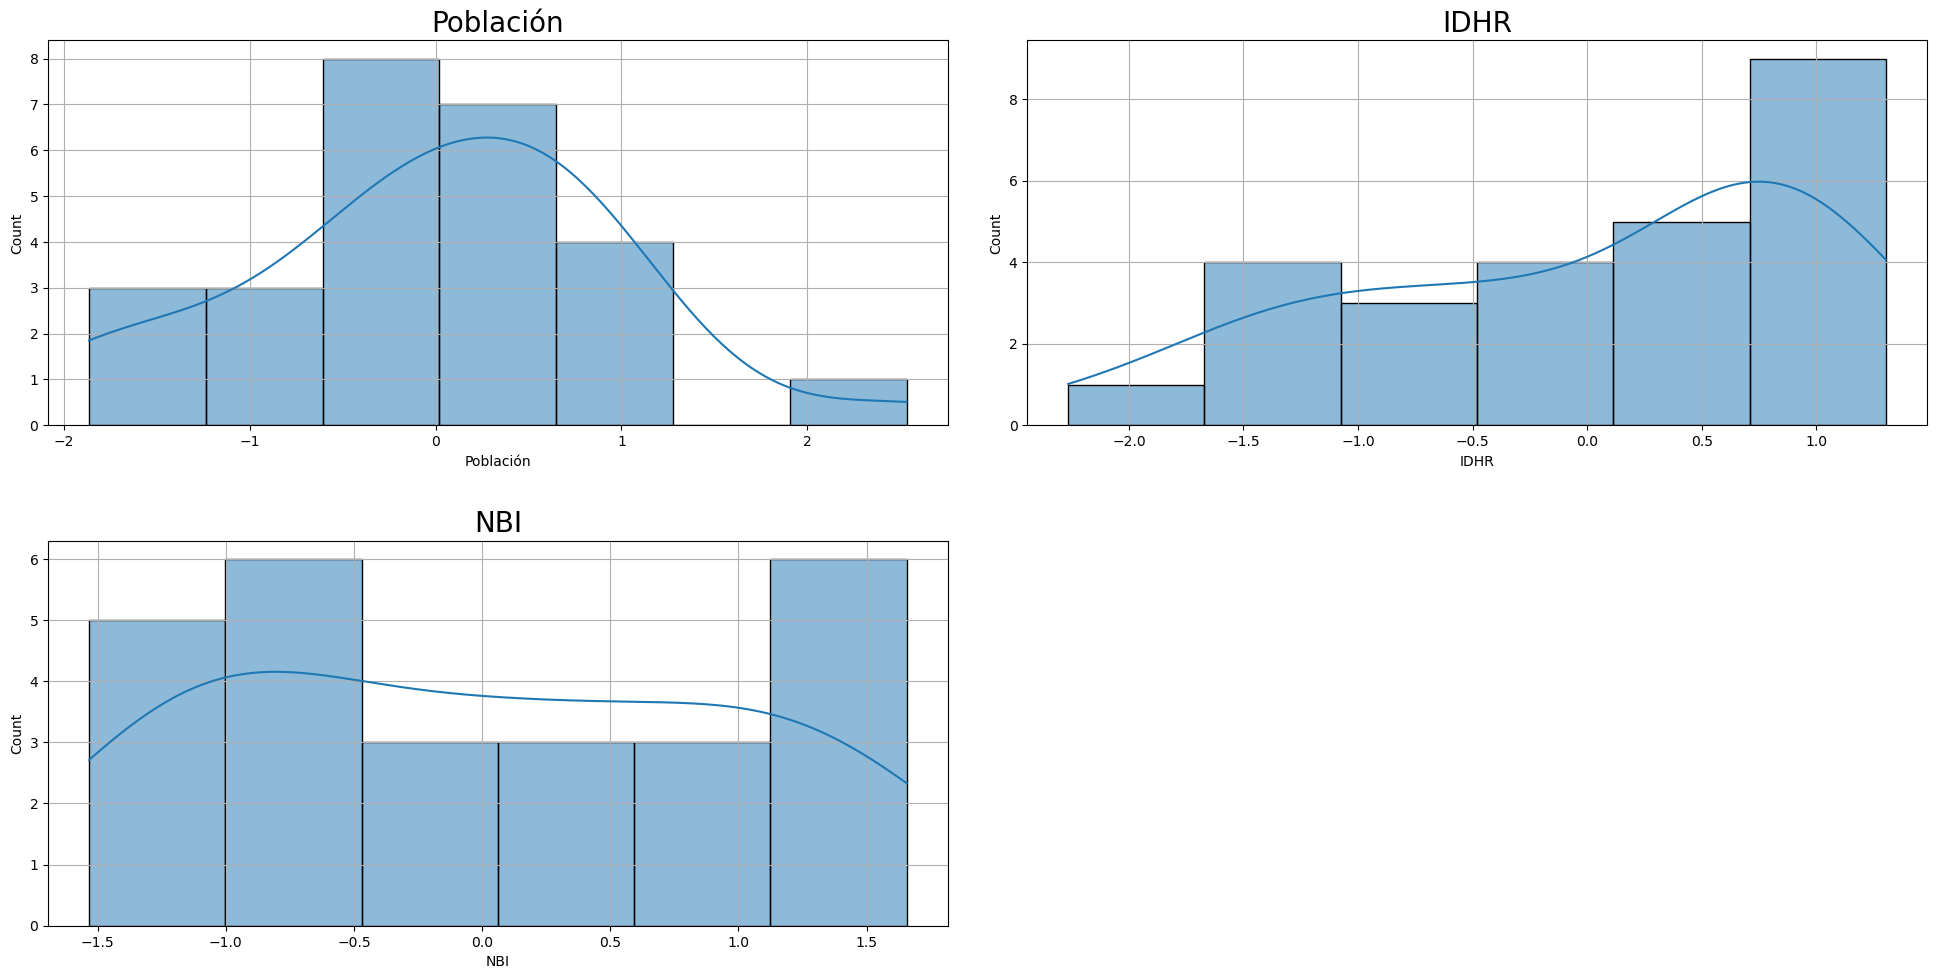

In [15]:
# (SI SE QUIERE OCUPAR MÁS ESPACIO CON LOS GRÁFICOS USAR ESTA OPCIÓN)

#import matplotlib.pyplot as plt
#from matplotlib.gridspec import GridSpec
#import pandas as pd
#import seaborn as sns

#fig = plt.figure(figsize=(20, 20))

# Crear un objeto GridSpec para especificar la estructura de la cuadrícula
#gs = GridSpec(4, 2, figure=fig)

# Subplot 1: Población (ocupa más espacio)
#ax1 = fig.add_subplot(gs[0, :])
#sns.histplot(df_data['Población'], kde=True, ax=ax1)
#ax1.set_title('Población', fontsize=20)
#ax1.grid(True)

# Subplot 2: IDHR (ocupa más espacio)
#ax2 = fig.add_subplot(gs[1, :])
#sns.histplot(df_data['IDHR'], kde=True, ax=ax2)
#ax2.set_title('IDHR', fontsize=20)
#ax2.grid(True)

# Subplot 3: NBI (ocupa más espacio)
#ax3 = fig.add_subplot(gs[2, :])
#sns.histplot(df_data['NBI'], kde=True, ax=ax3)
#ax3.set_title('NBI', fontsize=20)
#ax3.grid(True)

# Ajustar el espacio entre los subplots
#fig.tight_layout(pad=3.0)

# Mostrar la figura
#plt.show()


# Vemos si se corrigió el sesgo

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Crear una figura más grande
fig = plt.figure(figsize=(20,20))

# Subplot 1: Población 
ax1 = fig.add_subplot(421) # permite especificar más detalladamente el tamaño y pos de cada subplot
sns.histplot(df_data['Población'], kde=True, ax=ax1)
ax1.set_title('Población', fontsize=20)
ax1.grid(True)

# Subplot 2: IDHR 
ax2 = fig.add_subplot(422)
sns.histplot(df_data['IDHR'], kde=True, ax=ax2)
ax2.set_title('IDHR', fontsize=20)
ax2.grid(True)

# Subplot 3: NBI 
ax3 = fig.add_subplot(423)
sns.histplot(df_data['NBI'], kde=True, ax=ax3)
ax3.set_title('NBI', fontsize=20)
ax3.grid(True)

# Ajustar el espacio entre los subplots
fig.tight_layout(pad=3.0)

# Mostrar la figura
plt.show()

In [16]:
# Vemos el coeficiente del lambda de cada variable transformada para intuir el tipo de transformación efectuado por el método Box-Cox
# Para eso tenemos en cuenta:

#    se indica básicamente a que exponente se elevan los datos para la transformación:

#    lambda = -1 es una transformación recíproca (se toma el recíproco de los datos).
#    lambda = -0.5 es una transformación de raíz cuadrada recíproca.
#    lambda = 0.0 es una transformación logarítmica(se aplica el log natural a los datos).
#    lambda = 0.5 es una transformación de raíz cuadrada.
#    lambda = 1.0 no es una transformación (se eleva a la 1, Identidad).
#    lambda = 2.0 cuadrática.
#    0 < lambda < 1 potencias fraccionales
#    lambda < 0 recíprocas de potencia


print(f"Lambda de Box-Cox: {calc_lambdas_bc}")

# Vemos con los coeficientes que:
# -para 'Población' se realizó una transformación logarítmica 
# -para 'IDHR' una cuadrática 
# -para 'NBI' una transformación de raiz cuadrada recíproca

Lambda de Box-Cox: [ 0.00859482  1.99142614 -0.54980495]


# UNIDAD 4 (solo Evaluación de Algoritmos)

In [17]:
# Obtenemos el R2 en división por porcentajes
from sklearn.model_selection import train_test_split # para utilizar la división por %
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression 

test_size = 0.33 # datos para validar o testear el modelo (para entrenar quedaria 0.67)
seed = 7
X = df_data[['Población','IDHR']] # si tomamos NBI el grado de explicacioón del modelo baja
Y = df_data['PBG'] 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=test_size,random_state=seed) # desempaquetamos
model = LinearRegression()
model.fit(X_train,Y_train) # al modelo lo ajustamos(entrenamos) con los datos de entrenamiento
predicted = model.predict(X_test) # las predicciones del modelo las obtenemos usando las categorías de testeo
R2 = r2_score(Y_test,predicted) # el grado de ajuste o precisión del modelo lo obtenemos comparando lo predicho usando X_test con respecto a Y_test
print(f"El grado de explicación del modelo medido por R2 es de : {R2}")

El grado de explicación del modelo medido por R2 es de : 0.3301436402148076


In [19]:
# Obtenemos el MSE en división por porcentajes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

test_size = 0.2
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=test_size, random_state=seed)
model = LinearRegression()
model.fit(X_train,Y_train)
predicted = model.predict(X_test)
MSE = mean_squared_error(Y_test,predicted) # el MSE también se toma con respecto a los resultados predichos del modelo
print(MSE)

7571453059244.028


In [28]:
# Obtenemos el MAE en división por porcentajes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

test_size = 0.2
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=test_size, random_state=seed)
model = LinearRegression()
model.fit(X_train,Y_train)
predicted = model.predict(X_test)
MAE = mean_absolute_error(Y_test,predicted)
print(MAE)

1389873.8264902441


In [29]:
# Probemos entrenarlo con validación cruzada
from sklearn.model_selection import KFold # para emplear la validación cruzada (método de evaluación del modelo)
from sklearn.model_selection import cross_val_score # para calcular el score del modelo
from sklearn.linear_model import LinearRegression # importamos para usar un algoritmo (lo aprendemos después)

num_folds = 10 # número de k=10, iteraciones o vueltas a realizar
seed = 7 # para que los resultados me den siempre igual dentro de la aleatoriedad (permite comparación de modelos)
kfold = KFold(n_splits=num_folds,shuffle=True,random_state=seed) # Objeto de método de entrenamiento
model = LinearRegression() # Objeto del modelo a utilizar
scoring = 'neg_mean_squared_error' # (MSE)
# scoring = 'neg_mean_absolute_error' #(MAE)
# scoring = 'r2' #(R2)
results = cross_val_score (model,X,Y,cv=kfold,scoring=scoring) # (Modelo, características de entrada, clase y método de remuestreo o evaluación)
print(f"neg MSE: {results.mean()} ({({results.std()})})")

neg MSE: -2332473077300.577 ({4340569505896.742})


In [ ]:
# Vemos que al modelo le cuesta conseguir resultados por su poco contenido de instancias para buscar patrones y poder predecir correctamente